# Create Randomized List of Cities

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

# Get City Weather Data

In [6]:
# Import requests library and API key
import requests
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Set up basic URL with api key
url = f'http://api.openweathermap.org/data/2.5/weather?unit=Imperial&appid={weather_api_key}'

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pedasi
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | bonoua
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | meyungs
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | xinxiang
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | denpasar
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | nalut
Processing Record 19 of Set 1 | guerande
Processing Record 20 of Set 1 | andenes
Processing Record 21 of Set 1 | dhidhdhoo
Processing Record 22 of Set 1 | vila franca do campo
Processing

Processing Record 40 of Set 4 | toliary
City not found. Skipping...
Processing Record 41 of Set 4 | oistins
Processing Record 42 of Set 4 | auki
Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | witu
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | bousso
Processing Record 48 of Set 4 | villa oliva
City not found. Skipping...
Processing Record 49 of Set 4 | tucuman
Processing Record 50 of Set 4 | cordoba
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | limulunga
Processing Record 3 of Set 5 | marcona
City not found. Skipping...
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | muli
Processing Record 6 of Set 5 | luanda
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 5 | nabire
Processing Record 9 of Set 5 | nsukka
Processing Record 10 of Set 5 | fukue
Processing Record 11 of 

Processing Record 29 of Set 8 | birin
Processing Record 30 of Set 8 | khandyga
Processing Record 31 of Set 8 | piacabucu
Processing Record 32 of Set 8 | nacala
Processing Record 33 of Set 8 | grindavik
Processing Record 34 of Set 8 | liwale
Processing Record 35 of Set 8 | alta floresta
Processing Record 36 of Set 8 | razdolinsk
Processing Record 37 of Set 8 | monmouth
Processing Record 38 of Set 8 | nguiu
City not found. Skipping...
Processing Record 39 of Set 8 | mizan teferi
Processing Record 40 of Set 8 | manado
Processing Record 41 of Set 8 | buala
Processing Record 42 of Set 8 | moron
Processing Record 43 of Set 8 | moskovskiy
Processing Record 44 of Set 8 | ogaminana
Processing Record 45 of Set 8 | puerto madryn
Processing Record 46 of Set 8 | phan thiet
Processing Record 47 of Set 8 | atar
Processing Record 48 of Set 8 | bonthe
Processing Record 49 of Set 8 | cidreira
Processing Record 50 of Set 8 | ixtapa
Processing Record 1 of Set 9 | menongue
Processing Record 2 of Set 9 | wh

Processing Record 14 of Set 12 | pershotravneve
Processing Record 15 of Set 12 | makasar
Processing Record 16 of Set 12 | jardim
Processing Record 17 of Set 12 | mahajanga
Processing Record 18 of Set 12 | sur
Processing Record 19 of Set 12 | tabialan
City not found. Skipping...
Processing Record 20 of Set 12 | rock sound
Processing Record 21 of Set 12 | simplicio mendes
Processing Record 22 of Set 12 | longyearbyen
Processing Record 23 of Set 12 | zhongshu
Processing Record 24 of Set 12 | tambovka
Processing Record 25 of Set 12 | teruel
Processing Record 26 of Set 12 | buenaventura
Processing Record 27 of Set 12 | arbuzynka
Processing Record 28 of Set 12 | kanor
Processing Record 29 of Set 12 | arys
Processing Record 30 of Set 12 | batticaloa
Processing Record 31 of Set 12 | riberalta
Processing Record 32 of Set 12 | jutai
Processing Record 33 of Set 12 | huarmey
Processing Record 34 of Set 12 | goundam
Processing Record 35 of Set 12 | pangai
Processing Record 36 of Set 12 | virden
Pro

In [10]:
# Check number of cities' data retrieved
len(city_data)

569

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pedasi,7.5333,-80.0333,297.92,92,100,4.55,PA,2021-07-24 18:49:42
1,Tasiilaq,65.6145,-37.6368,279.24,98,100,2.56,GL,2021-07-24 18:49:43
2,Bonoua,5.2741,-3.5950,299.94,78,58,2.31,CI,2021-07-24 18:49:43
3,Yellowknife,62.4560,-114.3525,285.55,57,75,0.45,CA,2021-07-24 18:45:16
4,Busselton,-33.6500,115.3333,286.53,70,100,6.90,AU,2021-07-24 18:47:25
5,Jamestown,42.0970,-79.2353,299.92,61,20,1.79,US,2021-07-24 18:46:53
6,Hobart,-42.8794,147.3294,281.07,69,75,1.34,AU,2021-07-24 18:47:16
7,Arraial Do Cabo,-22.9661,-42.0278,298.13,57,0,10.80,BR,2021-07-24 18:49:44
8,Rikitea,-23.1203,-134.9692,293.72,53,0,0.71,PF,2021-07-24 18:49:44
9,Xinxiang,35.3089,113.8672,298.07,79,4,1.49,CN,2021-07-24 18:49:45


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pedasi,PA,2021-07-24 18:49:42,7.5333,-80.0333,297.92,92,100,4.55
1,Tasiilaq,GL,2021-07-24 18:49:43,65.6145,-37.6368,279.24,98,100,2.56
2,Bonoua,CI,2021-07-24 18:49:43,5.2741,-3.5950,299.94,78,58,2.31
3,Yellowknife,CA,2021-07-24 18:45:16,62.4560,-114.3525,285.55,57,75,0.45
4,Busselton,AU,2021-07-24 18:47:25,-33.6500,115.3333,286.53,70,100,6.90
5,Jamestown,US,2021-07-24 18:46:53,42.0970,-79.2353,299.92,61,20,1.79
6,Hobart,AU,2021-07-24 18:47:16,-42.8794,147.3294,281.07,69,75,1.34
7,Arraial Do Cabo,BR,2021-07-24 18:49:44,-22.9661,-42.0278,298.13,57,0,10.80
8,Rikitea,PF,2021-07-24 18:49:44,-23.1203,-134.9692,293.72,53,0,0.71
9,Xinxiang,CN,2021-07-24 18:49:45,35.3089,113.8672,298.07,79,4,1.49


In [13]:
# Convert Max Temp from Kelvin to Farenheit
# Define function for conersion
def K_to_F (tempK):
    tempF = (tempK-273.15)*(9/5) +32
    return tempF

# Update column in data file
city_data_df["Max Temp"] = K_to_F(city_data_df["Max Temp"])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pedasi,PA,2021-07-24 18:49:42,7.5333,-80.0333,76.586,92,100,4.55
1,Tasiilaq,GL,2021-07-24 18:49:43,65.6145,-37.6368,42.962,98,100,2.56
2,Bonoua,CI,2021-07-24 18:49:43,5.2741,-3.5950,80.222,78,58,2.31
3,Yellowknife,CA,2021-07-24 18:45:16,62.4560,-114.3525,54.320,57,75,0.45
4,Busselton,AU,2021-07-24 18:47:25,-33.6500,115.3333,56.084,70,100,6.90
5,Jamestown,US,2021-07-24 18:46:53,42.0970,-79.2353,80.186,61,20,1.79
6,Hobart,AU,2021-07-24 18:47:16,-42.8794,147.3294,46.256,69,75,1.34
7,Arraial Do Cabo,BR,2021-07-24 18:49:44,-22.9661,-42.0278,76.964,57,0,10.80
8,Rikitea,PF,2021-07-24 18:49:44,-23.1203,-134.9692,69.026,53,0,0.71
9,Xinxiang,CN,2021-07-24 18:49:45,35.3089,113.8672,76.856,79,4,1.49


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Latitudes

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## vs. Temperature

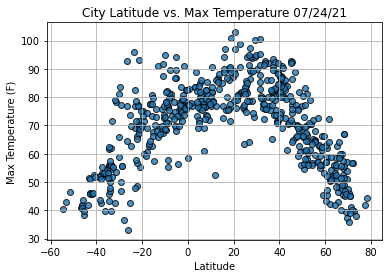

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## vs. Humidity

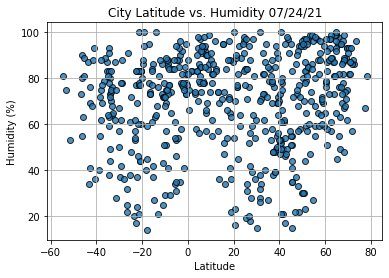

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## vs. Cloudiness

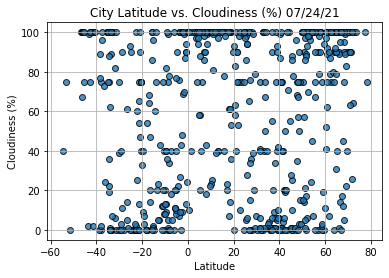

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## vs. Wind Speed

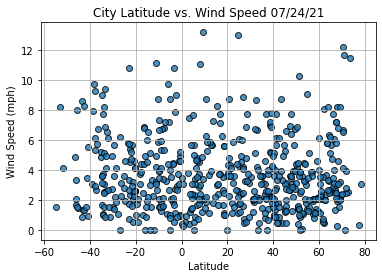

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Finding Correlations

In [20]:
# Import linregress
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values, y_values)
    print(f'Slope: {slope:.1f}, Intercept: {intercept:.1f}, r-value: {r_value:.3f}, p-value: {p_value:.3f}, Std.Error: {std_error:.3f}')

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Get Northern Hemisphere data - check output
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pedasi,PA,2021-07-24 18:49:42,7.5333,-80.0333,76.586,92,100,4.55
1,Tasiilaq,GL,2021-07-24 18:49:43,65.6145,-37.6368,42.962,98,100,2.56
2,Bonoua,CI,2021-07-24 18:49:43,5.2741,-3.5950,80.222,78,58,2.31
3,Yellowknife,CA,2021-07-24 18:45:16,62.4560,-114.3525,54.320,57,75,0.45
5,Jamestown,US,2021-07-24 18:46:53,42.0970,-79.2353,80.186,61,20,1.79


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pedasi,PA,2021-07-24 18:49:42,7.5333,-80.0333,76.586,92,100,4.55
1,Tasiilaq,GL,2021-07-24 18:49:43,65.6145,-37.6368,42.962,98,100,2.56
2,Bonoua,CI,2021-07-24 18:49:43,5.2741,-3.5950,80.222,78,58,2.31
3,Yellowknife,CA,2021-07-24 18:45:16,62.4560,-114.3525,54.320,57,75,0.45
5,Jamestown,US,2021-07-24 18:46:53,42.0970,-79.2353,80.186,61,20,1.79


In [25]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Busselton,AU,2021-07-24 18:47:25,-33.6500,115.3333,56.084,70,100,6.90
6,Hobart,AU,2021-07-24 18:47:16,-42.8794,147.3294,46.256,69,75,1.34
7,Arraial Do Cabo,BR,2021-07-24 18:49:44,-22.9661,-42.0278,76.964,57,0,10.80
8,Rikitea,PF,2021-07-24 18:49:44,-23.1203,-134.9692,69.026,53,0,0.71
12,Souillac,MU,2021-07-24 18:49:47,-20.5167,57.5167,70.178,83,75,2.57


## Between Latitude & Max Temp

Slope: -0.5, Intercept: 91.7, r-value: -0.699, p-value: 0.000, Std.Error: 0.026


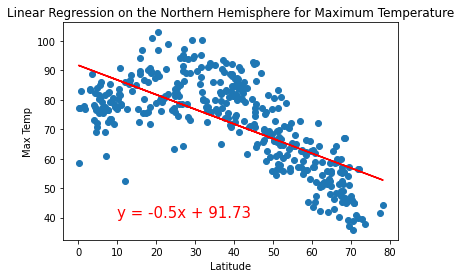

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

Slope: 0.8, Intercept: 82.6, r-value: 0.748, p-value: 0.000, Std.Error: 0.050


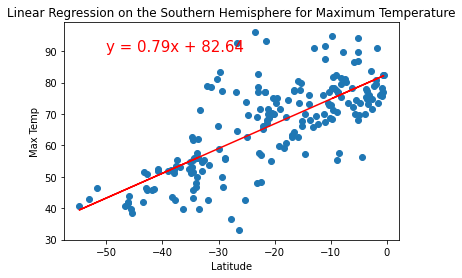

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,90))

## Between Latitude & Humidity 

Slope: 0.1, Intercept: 69.4, r-value: 0.057, p-value: 0.275, Std.Error: 0.053


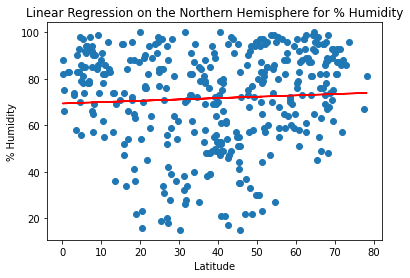

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))

Slope: 0.1, Intercept: 68.2, r-value: 0.036, p-value: 0.617, Std.Error: 0.108


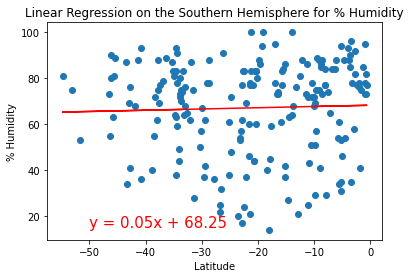

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,15))

## Between Latitude & Cloudiness

Slope: -0.1, Intercept: 65.4, r-value: -0.053, p-value: 0.310, Std.Error: 0.099


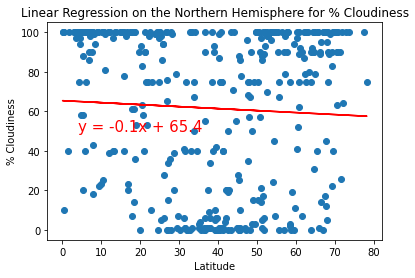

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (4,50))

Slope: -0.5, Intercept: 34.2, r-value: -0.165, p-value: 0.021, Std.Error: 0.208


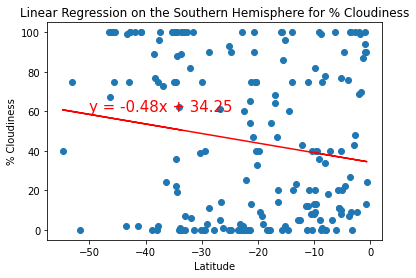

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))

## Between Latitude & Wind Speed

Slope: 0.0, Intercept: 3.4, r-value: 0.016, p-value: 0.752, Std.Error: 0.006


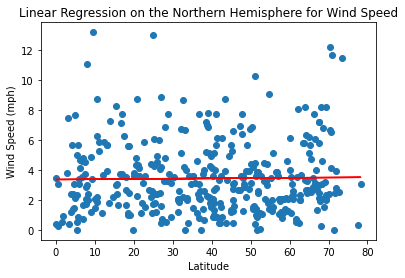

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (40,14))

Slope: -0.0, Intercept: 3.6, r-value: -0.049, p-value: 0.494, Std.Error: 0.013


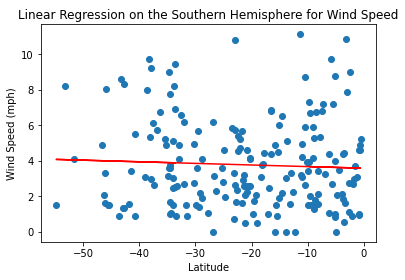

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-50,12))

# Creating Heatmaps

In [34]:
!pip install gmaps

In [1]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [2]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Pedasi,PA,2021-07-24 18:49:42,7.5333,-80.0333,76.586,92,100,4.55
1,1,Tasiilaq,GL,2021-07-24 18:49:43,65.6145,-37.6368,42.962,98,100,2.56
2,2,Bonoua,CI,2021-07-24 18:49:43,5.2741,-3.5950,80.222,78,58,2.31
3,3,Yellowknife,CA,2021-07-24 18:45:16,62.4560,-114.3525,54.320,57,75,0.45
4,4,Busselton,AU,2021-07-24 18:47:25,-33.6500,115.3333,56.084,70,100,6.90


In [3]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [4]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

## Create Temperature Heatmap

In [5]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Create Humidity Heatmap

In [6]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Create Cloudiness Heatmap

In [7]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Create Wind Speed Heatmap

In [8]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Vacation Recommendations

In [9]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [10]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Pedasi,PA,2021-07-24 18:49:42,7.5333,-80.0333,76.586,92,100,4.55
2,2,Bonoua,CI,2021-07-24 18:49:43,5.2741,-3.5950,80.222,78,58,2.31
5,5,Jamestown,US,2021-07-24 18:46:53,42.0970,-79.2353,80.186,61,20,1.79
7,7,Arraial Do Cabo,BR,2021-07-24 18:49:44,-22.9661,-42.0278,76.964,57,0,10.80
9,9,Xinxiang,CN,2021-07-24 18:49:45,35.3089,113.8672,76.856,79,4,1.49
13,13,Hilo,US,2021-07-24 18:49:48,19.7297,-155.0900,87.278,87,90,0.00
14,14,Denpasar,ID,2021-07-24 18:49:49,-8.6500,115.2167,76.658,88,75,1.54
16,16,Nalut,LY,2021-07-24 18:49:50,30.3333,10.8500,89.870,15,0,3.57
19,19,Dhidhdhoo,MV,2021-07-24 18:49:51,6.8833,73.1000,81.482,78,90,4.83
21,21,Matara,LK,2021-07-24 18:49:52,5.9485,80.5353,77.342,91,100,3.38


In [11]:
preferred_cities_df.count()

City_ID       216
City          216
Country       216
Date          216
Lat           216
Lng           216
Max Temp      216
Humidity      216
Cloudiness    216
Wind Speed    216
dtype: int64

In [12]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Pedasi,PA,76.586,7.5333,-80.0333,
2,Bonoua,CI,80.222,5.2741,-3.5950,
5,Jamestown,US,80.186,42.0970,-79.2353,
7,Arraial Do Cabo,BR,76.964,-22.9661,-42.0278,
9,Xinxiang,CN,76.856,35.3089,113.8672,
13,Hilo,US,87.278,19.7297,-155.0900,
14,Denpasar,ID,76.658,-8.6500,115.2167,
16,Nalut,LY,89.870,30.3333,10.8500,
19,Dhidhdhoo,MV,81.482,6.8833,73.1000,
21,Matara,LK,77.342,5.9485,80.5353,


In [14]:
# Set parameters to search for a hotel.
params = {"radius": 5000,
          "type": "lodging",
          "key": g_key}

for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [15]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Pedasi,PA,76.586,7.5333,-80.0333,Selina Pedasi
2,Bonoua,CI,80.222,5.2741,-3.5950,Hotel Bon Samaritian
5,Jamestown,US,80.186,42.0970,-79.2353,Hampton Inn & Suites Jamestown
7,Arraial Do Cabo,BR,76.964,-22.9661,-42.0278,Pousada Porto Praia
9,Xinxiang,CN,76.856,35.3089,113.8672,Guoyu Holiday Inn
...,...,...,...,...,...,...
554,Kisangani,CD,77.396,0.5167,25.2000,Grand Ramela Hotel
559,Tulagi,SB,82.274,-9.0996,160.1476,Raiders Hotel & Dive
561,Maracacume,BR,79.430,-2.0428,-45.9592,Hotel Ramos
567,Sola,VU,75.866,-13.8833,167.5500,Leumerus Bungalows


In [16]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))